## Wine Analysis:
 ### These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

<i>Data extraction<i>

In [2]:
df = pd.read_csv('Wine.csv', header=None)

In [3]:
df.columns=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline'] 

In [4]:
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<i>data adjustments<i>

In [5]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<i>exploratory analysis</i>

<AxesSubplot:>

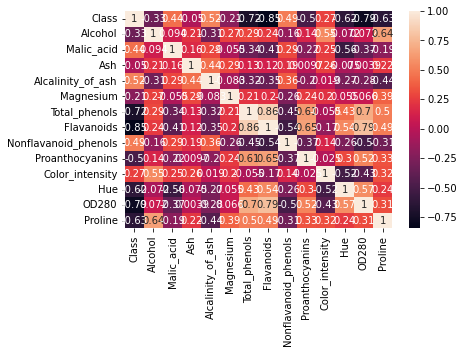

In [44]:
sns.heatmap(df.corr(), annot=True)

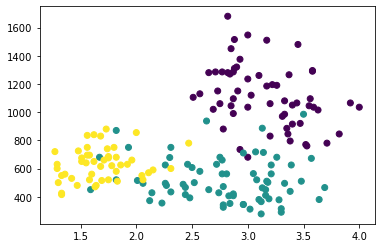

In [45]:
# OD280 vs Proline
xs=df.loc[:,'OD280']
ys=df.loc[:,'Proline']
plt.scatter(xs,ys, c=df['Class'])

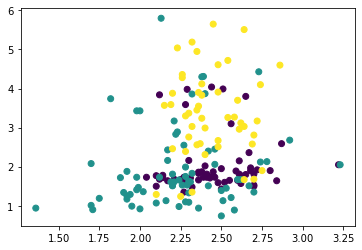

In [46]:
# Ash vs Malic_acid
xs=df.loc[:,'Ash']
ys=df.loc[:,'Malic_acid']
plt.scatter(xs,ys, c=df['Class'])

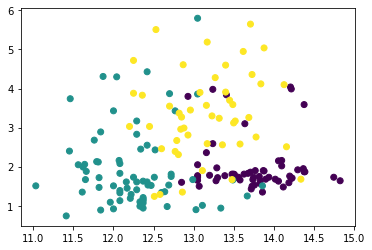

In [47]:
# Alcohol vs Malic_acid
xs=df.loc[:,'Alcohol']
ys=df.loc[:,'Malic_acid']
plt.scatter(xs,ys, c=df['Class'])

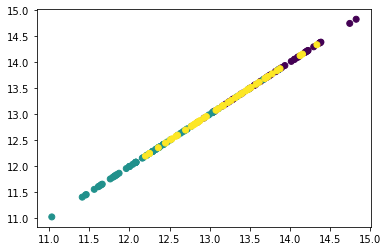

In [48]:
# Different proportions of alcohol for each cultivar
xs=df.loc[:,'Alcohol']
ys=df.loc[:,'Alcohol']
plt.scatter(xs,ys, c=df['Class'])

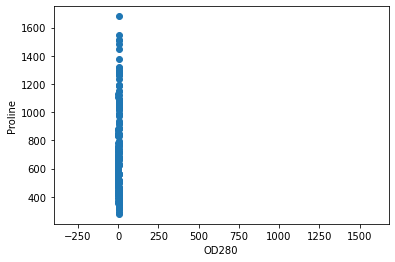

In [49]:
# Variance comparison between Proline and OD280
plt.scatter(df['OD280'],df['Proline'])
plt.xlim(-400,max(df['Proline']))
plt.xlabel('OD280')
plt.ylabel('Proline')
plt.show()

<i>Modellling and algorithms</i>

In [55]:
wine_df = df.drop(['Class'], axis=1)
wine_df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


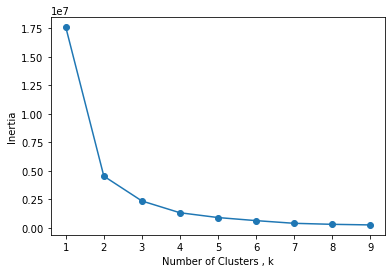

In [42]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(wine_df)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters , k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
wine_labels = kmeans.fit_predict(wine_df)

In [52]:
centroids = kmeans.cluster_centers_

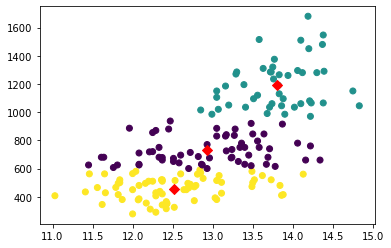

In [56]:
# Alcohol vs Malic_acid
xs=wine_df.iloc[:,0]
ys=wine_df.iloc[:,-1]
centroids_xs=centroids[:,0]
centroids_ys=centroids[:,-1]
plt.scatter(xs,ys,c=wine_labels)
plt.scatter(centroids_xs,centroids_ys,marker='D',s=50,c='red')
plt.show()